# Linear Regression
## Introduction

Linear regression is one of the simplest predictive models. It allows us to predict a variable $y$ assuming a linear relationship with the features $X$. Since it is a very simple model, there are many different ways to approach it.

Not every problem can be approached using a linear regression: we need to have a linear relationship in our data! Moreover, there are other assumptions of a technical nature. We can summarize them as

* <b>L</b>: The mean of the response $\mathbb{E}(y_i)$ at each value of the predictor $x_i$ is a <b>l</b>inear function of the $x_i$.
* <b>I</b>: The errors $\varepsilon_i$ are <b>i</b>ndependent.
* <b>N</b>: The errors $\varepsilon_i$, at each value of the predictor $x_i$, are <b>n</b>ormally distributed.
* <b>E</b>: The errors $\varepsilon_i$, at each value of the predictor $x_i$, have <b>e</b>qual variances.

We will explain the main ideas and the necessity of these assumptions.

## Simple linear regression

The simplest case is when we have only one feature, or in other words, when we want to predict a relationship of the form $$y = \beta_1 x + \beta_0$$ for certain coefficients $\beta_0,\beta_1$.

Suppose that we have data points $(x_1,y_1),\ldots,(x_m,y_m)$, and we write $\mathbf{x}=(x_1,\ldots,x_m)$ and $\mathbf{y}=(y_1,\ldots,y_m)$. We will denote the mean of a given vector by $$\bar{\mathbf{x}} = \dfrac{1}{m}\displaystyle\sum_{i=1}^m x_i.$$

We want the "best fitting line" to this data. One possible way is to <i>minimize the error</i>. There are different notions of error, but the most common one is the <i>mean squared error</i>: $$\mathrm{MSE}(\widehat{\mathbf{y}},\mathbf{y}) = \dfrac{1}{m}\displaystyle\sum_{i=1}^m (\widehat{y_i} - y_i)^2,$$ where $\widehat{y_i}$ denotes our prediction for the $i$-th data point. In particular, assuming that $\widehat{y_i} = \beta_1x_i+\beta_0$, we see that the mean squared error $$\mathrm{MSE}(\beta_0,\beta_1) = \dfrac{1}{m}\displaystyle\sum_{i=1}^m (\beta_1x_i+\beta_0 -y_i)^2$$ is a function of $\beta_0$ and $\beta_1$. We want $\widehat{\beta_0},\widehat{\beta_1}$ minimizing the mean squared error.

To minimize such function, we can calculate the derivative with respect to $\beta_0$ and $\beta_1$. We see that

$\begin{align*}
\dfrac{\partial \mathrm{MSE}}{\partial \beta_0} &= \dfrac{1}{m}\displaystyle\sum_{i=1}^m 2(\beta_1x_i+\beta_0 - y_i) \\
\dfrac{\partial \mathrm{MSE}}{\partial \beta_1} &= \dfrac{1}{m}\displaystyle\sum_{i=1}^m 2 x_i (\beta_1x_i+\beta_0-y_i)
\end{align*}$

Looking at the points where the derivatives vanish and the first equation we immediately see that $$\widehat{\beta_0} = \bar{\mathbf{y}} - \bar{\mathbf{x}} \widehat{\beta_1}.$$
Plugging this into the second equation yields $$\widehat{\beta_1} = \dfrac{\displaystyle\sum_{i=1}^m (x_i -\bar{\mathbf{x}})(y_i - \bar{\mathbf{y}})}{\displaystyle\sum_{i=1}^m (x_i - \bar{\mathbf{x}})^2}.$$
Notice that we can identify the numerator as the covariance $\mathrm{Cov}(\mathbf{x},\mathbf{y})$ and the denominator as $\mathrm{Var}(\mathbf{x})$. We will come back to the intuitive explanation of this coefficient later when we discuss the <i>coefficient of determination</i>.

## Simple linear regression in Python

Now we will see how to implement simple linear regression in Python in two different ways:
* Using the exact formulas for the coefficients discussed above
* Using <i>Gradient Descent</i>.

Predicted beta_0 = -0.9698584373849937
Predicted beta_1 = 1.9374221502643154


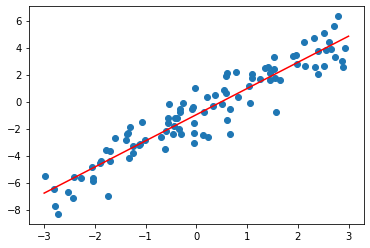

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate toy data that behaves roughly linearly
x = np.random.uniform(low=-3,high=3,size=100)
error_terms = np.random.randn(100)
y = 2*x - 1 + error_terms

# Calculate the slope and intercept explicitly
x_bar = np.mean(x,axis=0)
y_bar = np.mean(y,axis=0)
beta1 = sum((x[i]-x_bar)*(y[i]-y_bar) for i in range(len(x))) / sum((x[i]-x_bar)**2 for i in range(len(x)))
beta0 = y_bar - x_bar*beta1
L = lambda t : beta1 * t + beta0

print(f"Predicted beta_0 = {beta0}")
print(f"Predicted beta_1 = {beta1}")

# Plot the data and the predicted line
plt.scatter(x,y)
plt.plot(np.linspace(-3,3,100), L(np.linspace(-3,3,100)), color='red')
plt.show()

## Gradient Descent

We illustrate this idea here since it is fundamental in the domain of Machine Learning. Even though in our case we can solve for $\widehat{\beta_0}$ and $\widehat{\beta_1}$ explicitly, this technique is very useful in the cases where we want to solve a minimization problem for which the solution is not explicit.

The idea is to look at the graph of our function and move in the direction of fastest decay. When we have a smooth function $f:\Omega\subseteq\mathbb{R}^n\to\mathbb{R}$, that direction is given by the negative gradient $-\nabla f$. Indeed, if $v$ is any direction, $$\dfrac{\partial f}{\partial v} = \nabla f \;\cdot\; v,$$ and the direction maximizing decay is $-\nabla f$ as a direct consequence of the Cauchy-Schwartz inequality.

In the case of the MSE, this is a convex function of $\beta_0, \beta_1$. Hence, gradient descent will converge to the unique minimum of the function.

C:\Users\Nacho\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


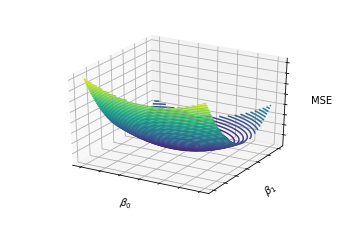

In [10]:
# 3d plot of the MSE as a function of beta_0 and beta_1
from mpl_toolkits import mplot3d

def MSE(b0, b1):
    return sum((y[i] - b1*x[i] -b0)**2 for i in range(len(y)))

X_axis, Y_axis = np.meshgrid(np.linspace(-6, 6, 30), np.linspace(-6, 6, 30))
Z_axis = MSE(X_axis, Y_axis)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X_axis, Y_axis, Z_axis, 50, cmap='viridis')

# To do: plot the gradient flow

# Remove numbers from axes
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# Set labels
ax.set_xlabel(r"$\beta_0$")
ax.set_ylabel(r"$\beta_1$")
ax.set_zlabel("MSE")
ax.dist = 12

Estimated beta_0 = -0.9697949847994886
Estimated beta_1 = 1.9374160116717434


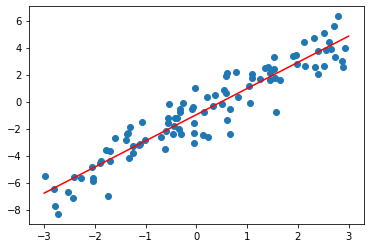

In [11]:
# Gradient Descent
# ---------------------------

# Initialize beta0, beta1
b0 = 0
b1 = np.random.randn()

def gradientMSE(b0,b1):
    return np.array([sum(b1*x[i] + b0 - y[i] for i in range(len(x)))/len(x), sum( x[i] * (b1*x[i] + b0 - y[i]) for i in range(len(x)))/len(x)])

def gradientDescent(b0,b1, learning_rate = 1e-3, iterations=10000):
    n_iterations = 0
    while n_iterations < iterations:
        b = np.array([b0,b1])
        b = b - learning_rate * gradientMSE(b0,b1)
        b0 = b[0]
        b1 = b[1]
        n_iterations += 1
    return b0,b1

b0,b1 = gradientDescent(b0,b1) # Estimate the slope and intercept using Stochastic Gradient Descent

# Calculate the slope and intercept explicitly
L = lambda t : b1 * t + b0

print(f"Estimated beta_0 = {b0}")
print(f"Estimated beta_1 = {b1}")

# Plot the data and the predicted line
plt.scatter(x,y)
plt.plot(np.linspace(-3,3,100), L(np.linspace(-3,3,100)), color='red')
plt.show()


## Statistical Properties of the Slope and Intercept

The estimators $\widehat{\beta_0},\widehat{\beta_1}$ carry more statistical information than just the mere values.
For instance, it is interesting to know whether a coefficient $\beta_i = 0$ or not, given our prediction. In order to carry out such a hypothesis test we need to have <i>confidence intervals</i> for $\beta_i$.

To construct confidence intervals for the slope and intercept, we need the <i>normality assumption</i> of the error terms. 

Suppose that $y$ is the random variable we want to predict in terms of the random variable $x$. 
If we write our predictor $f_\beta(x) = \beta_1 x + \beta_0$, the error term is the random variable $$\varepsilon = y - f_\beta(x).$$ We can look at the conditional expectation $$\mathbb{E}(y|x) = \mathbb{E}(f_\beta(x) + \varepsilon | x) = \beta_0 + \beta_1 x + \varepsilon$$ since we consider $x$ as given data we know and $y$ contains the random information.

Notice that under these assumptions, if $\varepsilon\sim N(0,\sigma^2)$ is a Gaussian random variable with expectation zero and variance $\sigma^2$, then the observations $y_1,\ldots,y_m$ must also be Gaussian random variables with variance $\sigma^2$ (again, conditioning with respect to $x_1,\ldots,x_m$). This assumption that each prediction must have the same variance is called <i>homoscedasticity</i>.

Using these ideas, we can find the standard deviation for $\widehat{\beta_0}$ and $\widehat{\beta_1}$.
Our formula for $\widehat{\beta_1}$ can be rewritten as a linear function of $y_1,\ldots,y_m$ (taking $x_1,\ldots,x_m$ as constants), as follows $$\widehat{\beta_1} = \dfrac{\displaystyle\sum_{i=1}^m (x_i-\bar{\mathbf{x}})(y_i - \bar{\mathbf{y}})}{\sum_{i=1}^m (x_i-\bar{\mathbf{x}})^2} = \dfrac{(x_1-\bar{\mathbf{x}})y_1 + \ldots + (x_m-\bar{\mathbf{x}})y_m}{(x_1-\bar{\mathbf{x}})^2 + \ldots + (x_m-\bar{\mathbf{x}})^2}.$$

Assuming that $y_1,\ldots,y_m$ are random variables with the same variance $\sigma^2$ (homoscedasticity) we see that $$\mathrm{Var}(\widehat{\beta_1}) = \dfrac{(x_1-\bar{\mathbf{x}})^2 \sigma^2 + \ldots + (x_m-\bar{\mathbf{x}})^2 \sigma^2}{\left((x_1-\bar{\mathbf{x}})^2 + \ldots + (x_m-\bar{\mathbf{x}})^2 \right)^2} = \dfrac{\sigma^2}{(x_1-\bar{\mathbf{x}})^2 + \ldots + (x_m - \bar{\mathbf{x}})^2}.$$

Now for $\widehat{\beta_0}$ the situation is slightly simpler. Since $$\widehat{\beta_0}=\bar{\mathbf{y}} - \widehat{\beta_1}\bar{\mathbf{x}} = \dfrac{y_1+\ldots + y_m}{m} - \widehat{\beta_1}\bar{\mathbf{x}}$$ we obtain $$\mathrm{Var}(\widehat{\beta_0}) = \dfrac{\mathrm{Var}(y_1)+\ldots+\mathrm{Var}(y_m)}{m^2} + \mathrm{Var}(\widehat{\beta_1}\bar{\mathbf{x}}) + 2\mathrm{Cov}\left(\dfrac{y_1+\ldots+y_m}{m}, \widehat{\beta_1}\bar{\mathbf{x}}\right).$$

However, it is easy to see that the covariance term vanishes, leaving us with $$\mathrm{Var}(\widehat{\beta_0}) = \dfrac{\sigma^2}{m} + \bar{\mathbf{x}}^2 \mathrm{Var}(\widehat{\beta_1}) = \left(\dfrac{1}{m} + \dfrac{\bar{\mathbf{x}}^2}{(x_1-\bar{\mathbf{x}})^2 + \ldots +(x_m-\bar{\mathbf{x}})^2} \right)\sigma^2. $$

Finally, notice that to apply the formula we need to estimate the variance $\sigma^2$ of $y$. To do this, we use the sample variance from our samples $y_1,\ldots,y_m$. In other words, we use $$\sigma^2 = \dfrac{1}{m-1}\displaystyle\sum_{i=1}^{m} (y_i-\bar{\mathbf{y}})^2,$$ the unbiased estimator of the variance.

## Hypothesis test for $\beta_1=0$

The normality assumption of the errors (or a generalized version of the central limit theorem with a large sample size when we don't have such an assumption) allows us to design a simple hypothesis test to try and understand whether a slope coefficient is non-zero. In other words, if the $x$ variable has predictive power.

To do this, simply notice that $\widehat{\beta_1}$ follows a normal distribution since it is a linear combination of the normal independent variables $y_i$, whose mean $\mathbb{E}(\widehat{\beta_1})=\beta_1$ and variance $\mathrm{Var}(\widehat{\beta_1}) = \dfrac{\sigma^2}{\sum_{i=1}^m (x_i-\bar{\mathbf{x}})^2}$ are known.

To test whether $\beta_1$ is $0$ or not, we simply look at the $Z$-score $$Z = \dfrac{\widehat{\beta_1}}{\dfrac{\sigma}{\sqrt{{\sum_{i=1}^m (x_i-\bar{\mathbf{x}})^2}}}} = \dfrac{\widehat{\beta_1} \sqrt{{\displaystyle\sum_{i=1}^m (x_i-\bar{\mathbf{x}})^2}}}{\sigma}$$

3.2225944917501842e-21


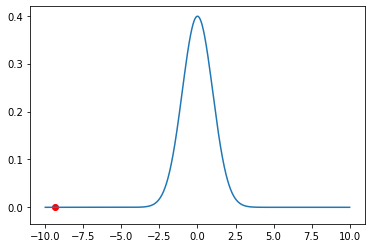

In [12]:
# Hypothesis test for our predictor beta_1 = 0
# ---------------------------------------------

# Null hypothesis: beta_1 = 0
# We calculate our estimator beta_1^ and its standard deviation
from scipy.stats import norm

beta1 = sum((x[i]-x_bar)*(y[i]-y_bar) for i in range(len(x))) / sum((x[i]-x_bar)**2 for i in range(len(x)))
y_sample_variance = sum((y[i]-y_bar)**2 for i in range(len(y)))/(len(y)-1)
var_beta1 = y_sample_variance / sum((x[i] - x_bar)**2 for i in range(len(x)))

# If the p-value is less than 0.05, we reject the null hypothesis, meaning that beta_1^ is not zero
# and the variable x has predictive power over y!
p_value = norm.cdf((0 - beta1) / np.sqrt(var_beta1))
print(p_value)

# Plot the graph of the normal distribution and our Z-score
plt.scatter([(0 - beta1) / np.sqrt(var_beta1)],[norm.pdf((0 - beta1) / np.sqrt(var_beta1))],color="red")
plt.plot(np.linspace(-10, 10, 1000), norm.pdf(np.linspace(-10, 10, 1000)))
plt.show()

## Bias-Variance Tradeoff

Suppose that we want to predict a certain parameter $\theta$, and we have some estimator $\widehat{\theta}$. We say that the estimator is <i>unbiased</i> if $\mathbb{E}(\widehat{\theta}) = \theta$. More generally, the bias of an estimator is $\mathrm{bias}(\widehat{\theta}) = \mathbb{E}(\widehat{\theta}) - \theta$. In other words, the bias is the error that comes from the estimator itself. On the other hand, the <i>variance</i> is the sensitivity that comes from the training data. The mean squared error can be written as $$\begin{align*}\mathrm{MSE}(\widehat{\theta},\theta) = \mathbb{E}((\widehat{\theta}-\theta)^2) &= (\mathbb{E}(\widehat{\theta})-\theta)^2 + \mathbb{E}((\widehat{\theta} - \mathrm{E}(\widehat{\theta}))^2) \\ &= \mathrm{bias}(\theta,\widehat{\theta})^2 + \mathrm{Var}(\widehat{\theta}).\end{align*}$$
This tells us that the error can be decomposed into bias and variance, quantifying the bias-tradeoff variance.

<center>
<img src="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png" alt="BiasVariance" width="500"/>
</center>

## BLUE: Best Linear Unbiased Estimator

The estimators $\widehat{\beta_0},\widehat{\beta_1}$ we described using the method of least squares have an important property. They are the best linear unbiased estimators of the true $\beta_0,\beta_1$. What do we mean by this?

A very important point, that we used when calculating the variance of the estimators $\widehat{\beta_0},\widehat{\beta_1}$ is that they are linear functions of $y_1,\ldots,y_m$ (when considering the $x_1,\ldots,x_m$ as constants). It is easy to see, from such formula, that $\mathbb{E}(\widehat{\beta_1})=\beta_1$ is an unbiased estimator for the slope, and similarly that $\mathbb{E}(\widehat{\beta_0})=\beta_0$ is an unbiased estimator for the intercept.

The claim is that any other linear function of $y_1,\ldots,y_m$ that we use as unbiased predictors for $\beta_0,\beta_1$ will have larger variance. This takes the name of <b>Gauss-Markov</b> theorem.

Suppose that we have some unbiased estimator $\widetilde{\beta_1} = c_1y_1+\ldots+c_m y_m$, or in other words, having $\mathbb{E}(\widetilde{\beta_1}) = \beta_1$. This implies that $\displaystyle\sum_{i=1}^m c_i=0$ and $\displaystyle\sum_{i=1}^m c_i x_i=1$.

Therefore, the trick is to write the variance of $\widetilde{\beta_1}$ as
$$\sigma^2 \; \displaystyle\sum_{i=1}^m c_i^2 = \displaystyle\sum_{i=1}^m \sigma^2\left(c_i - \dfrac{x_i-\bar{\mathbf{x}}}{\sum_{i=1}^m (x_i-\bar{\mathbf{x}})^2}\right)^2 + \dfrac{\sigma^2}{\sum_{i=1}^m (x_i - \bar{\mathbf{x}})^2}.$$
This is elementary to verify and it shows that the variance is minimized precisely when $c_i = \dfrac{x_i-\bar{\mathbf{x}}}{\sum_{i=1}^m (x_i-\bar{\mathbf{x}})^2}.$

## Coefficient of Determination

A very important measure of "goodness of fit" of the line is given by the $R^2$-coefficient, also known as <i>coefficient of determination</i>. Moreover, this coefficient has an intuitive explanation.

We want to understand how much of the variance of our dependent variable $y$ can be explained by the variance of the explanatory variable $x$.

In more precise mathematical terms, the total sum of squares is proportional to the variance of the data $$\mathrm{SS}_\mathrm{tot} = \displaystyle\sum_{i=1}^{m} (y_i-\bar{\mathrm{y}})^2$$ and the sum of squared residuals $$\mathrm{SS}_\mathrm{res} = \displaystyle\sum_{i=1}^m \left(y_i - (\beta_0 + \beta_1 x_i)\right)^2$$ is proportional to the variance of the data that is explained by the model. The coefficient of determination, defined as $$R^2 = 1 - \dfrac{\mathrm{SS}_\mathrm{res}}{\mathrm{SS}_\mathrm{tot}},$$ is the fraction of variance unexplained by the model. A model that perfectly fits the points will have $R^2=1$, whereas a model that always predicts the mean $\bar{\mathbf{y}}$ will have $R^2=0$.

In [13]:
# We can evaluate the goodness of fit of our linear regression

Rsq = 1 - (sum((y[i] - (beta0 + beta1 * x[i]))**2 for i in range(len(x))))/(sum((y[i]-y_bar)**2 for i in range(len(x))))
print(f"Coefficient of determination: {Rsq}")

Coefficient of determination: 0.8891972919718201
